# Car Price Dataset Overview


 A car price dataset typically includes various features of cars, such as make, model, year, mileage, fuel type, engine size, transmission, and condition, among others. The price is usually the target variable. These datasets are used for predicting car prices and analyzing market trends. Key factors influencing car prices include the car's age, mileage, brand, and condition. The data can have both categorical (e.g., make, model) and numerical (e.g., price, mileage) features, and may require processing like encoding categorical data for machine learning tasks.

Such datasets are valuable for tasks like price prediction, market analysis, and brand comparison.

# Import Necessary Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso


# Load the Dataset 

In [3]:
car_df = pd.read_csv("car data.csv")

In [4]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Top five rows of the dataset

In [5]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Last Five rows of the dataset

In [6]:
car_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Checking the shape of the dataset

In [7]:
car_df.shape

(301, 9)

# Checking the size of the dataset

In [8]:
car_df.size

2709

# Checking the information of the dataset

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB



# Checking the statsical information about the dataset

In [10]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000



# Checking the missing values of dataset

In [11]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Checking the distribution of categorical data

In [12]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
car_df.	Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [14]:
car_df.	Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [15]:
car_df.	Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

# Encoding the categorical data

In [16]:
# fuel type column
car_df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

C:\Users\naush\AppData\Local\Temp\ipykernel_18480\885105641.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)


In [17]:
# seller type columns
car_df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

C:\Users\naush\AppData\Local\Temp\ipykernel_18480\1592061676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)


In [18]:
# Transmission Type column
car_df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

C:\Users\naush\AppData\Local\Temp\ipykernel_18480\2242402563.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)


In [19]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Train Test Split

In [21]:
y = car_df["Selling_Price"]

In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
x = car_df.drop(columns=['Car_Name','Selling_Price'])

In [24]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240, 7), (61, 7), (240,), (61,))

In [27]:
x_train.size,x_test.size,y_train.size,y_test.size

(1680, 427, 240, 61)


# Fitting the Linear regression


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model_lin = LinearRegression()

In [30]:
model_lin.fit(x_train,y_train)

LinearRegression()

# Prediction on the training data

In [45]:
train_data_prediction =model_lin.predict(x_train)

In [46]:
train_data_prediction

array([ 6.78487861e+00,  1.03052148e+00,  4.33053370e+00,  2.19376150e-02,
        3.57946207e+00,  2.79503372e+00,  1.43719894e+00,  4.14889545e-01,
        1.61166418e+00,  1.12839641e+00,  4.32086309e+00,  6.17477452e+00,
        9.29097627e-01,  7.35592155e-01,  6.15378778e+00,  3.42694561e+00,
        2.32984882e+00,  7.50014006e+00,  4.61811711e+00,  4.43437311e+00,
        4.45915634e+00,  2.73352428e+00,  4.44377264e+00,  1.71378422e+00,
        2.49318608e-01,  3.94331375e+00,  1.37445456e+00,  4.61754769e+00,
        1.38595068e+00,  7.35605367e+00,  7.24473016e+00,  6.54331682e+00,
        2.29055849e+00,  2.19058216e+01,  2.19873970e+00,  5.64492151e+00,
        2.82714047e+00,  7.68311323e+00,  5.67039850e+00,  1.00273475e+01,
        1.99828812e+00,  2.37716894e+00,  1.22731322e+00,  2.40303328e+00,
        9.94390646e+00,  2.01662591e+00, -6.42391420e-01,  5.42943934e+00,
        1.14107420e+01, -5.10458803e-03,  1.09479248e+00,  1.61329534e+00,
        5.38687939e+00,  

# R2_score Error training data

In [48]:
error= r2_score(y_train,train_data_prediction)

In [49]:
error

0.8838169193709792

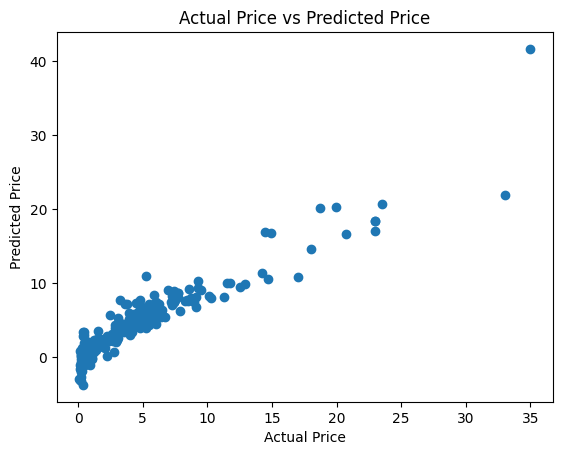

In [50]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on the Testing data

In [51]:
test_data_prediction =model_lin.predict(x_test)

In [52]:
test_data_prediction

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

# R2_score Error on test data

In [54]:
error= r2_score(y_test,test_data_prediction)

In [55]:
error

0.8401532365378521

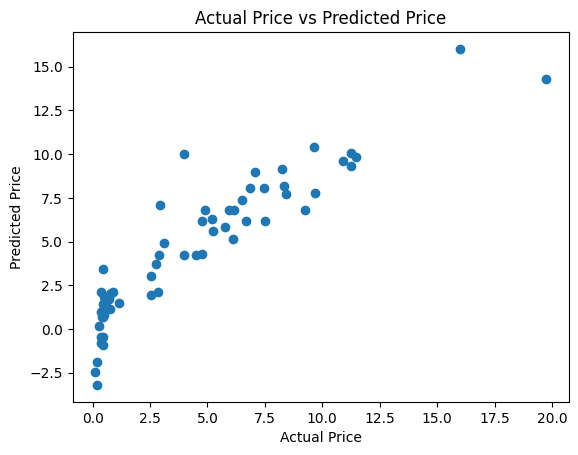

In [56]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Lasso Regression

In [59]:

from sklearn.linear_model import Lasso

In [60]:
lass_reg_model= Lasso()

In [61]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [62]:
training_data_prediction = lass_reg_model.predict(x_train)

In [63]:
training_data_prediction

array([ 6.85731814e+00,  2.79282762e+00,  3.99063437e+00,  8.75688602e-01,
        3.14074535e+00,  2.62103136e+00,  2.12827971e+00,  1.21004472e+00,
        2.19379173e+00,  1.77134131e+00,  4.39322978e+00,  4.25192594e+00,
        1.55623769e+00,  2.67549264e+00,  4.37083118e+00,  2.40749345e+00,
        2.89643841e+00,  6.05614971e+00,  5.00692839e+00,  4.39182664e+00,
        3.66792966e+00,  2.68794262e+00,  4.39446455e+00,  2.32653121e+00,
        1.02346126e+00,  3.68348447e+00,  1.49674994e+00,  5.00631381e+00,
        2.07296735e+00,  6.17193205e+00,  7.80420501e+00,  5.35015034e+00,
        2.85403227e+00,  2.05441375e+01,  2.60640745e+00,  5.66829734e+00,
        3.19788684e+00,  3.85367707e+00,  9.56901308e+00,  8.46997520e+00,
        2.51381101e+00,  2.52037820e+00,  1.76694963e+00,  2.98030613e+00,
        8.51884593e+00,  2.11660460e+00,  9.79790755e-01,  4.04997316e+00,
        1.23796925e+01,  8.40496269e-01,  1.72418733e+00,  1.51195673e+00,
        5.49568979e+00,  

In [64]:
error_score = r2_score(y_train,training_data_prediction)

In [65]:
error_score 

0.843587395258283

In [66]:
testing_data_prediction = lass_reg_model.predict(x_test)

In [67]:
testing_data_prediction 

array([ 9.84567382,  1.41978996,  4.33000433,  3.17455558,  8.92053425,
        4.27617308,  3.7331185 ,  5.65469631,  0.9067815 ,  5.24312003,
        6.45060323,  4.39580233,  1.28891382,  8.24160548,  2.00848206,
        2.30994514,  2.5492099 ,  2.34681358,  7.97733531,  4.18658601,
        2.31777374,  7.86684049,  2.01868131,  8.55068741,  1.53941124,
        6.48280905,  2.1138961 , -1.18968392,  4.00416509,  2.18458499,
        2.4093372 ,  3.56273297,  5.58698712,  8.26139501, -0.83259354,
        5.27147158,  6.48649531,  5.72043366,  6.39669211,  4.79182476,
       15.51840214,  2.59837644,  1.67424249,  0.45725311,  5.16817508,
        6.85817855,  1.61450208,  5.29605485, 13.86828069,  2.87644681,
        6.44593415,  0.08044801,  9.97507828,  1.79190966,  2.64946731,
        0.0470775 ,  1.38245113, 10.10098365,  0.44332429, -1.30063353,
        8.95788022])

In [68]:
error_score = r2_score(y_test,testing_data_prediction)

In [69]:
error_score 

0.8497457570738539